In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from data.constants import DATASET_PATH, DATASET_FOR_API_MODELS

df = pd.read_parquet(DATASET_PATH)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24700 entries, 0 to 24699
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      24700 non-null  object 
 1   Drug_ID    24700 non-null  object 
 2   Drug       24700 non-null  object 
 3   Target_ID  24700 non-null  object 
 4   Target     24700 non-null  object 
 5   Y          24700 non-null  float32
dtypes: float32(1), object(5)
memory usage: 1.0+ MB


# Анализ распределения данных

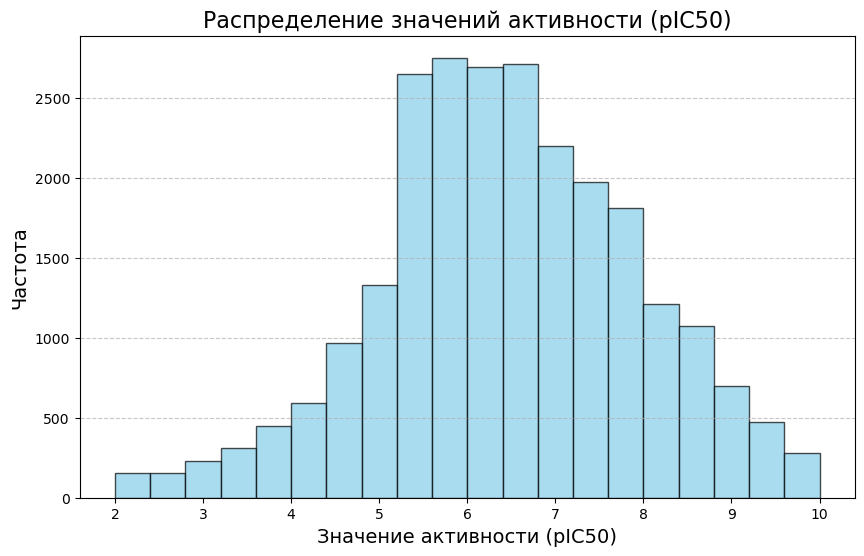

In [46]:

# Построение гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
plt.hist(df['Y'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Добавление заголовков и меток
plt.title('Распределение значений активности (pIC50)', fontsize=16)
plt.xlabel('Значение активности (pIC50)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Сетка для лучшей читаемости

# Отображение графика
plt.show()

In [47]:
import pandas as pd

# Предполагаем, что df — это ваш DataFrame с данными
std_dev = df['Y'].std()
print(f"Стандартное отклонение значений активности (pIC50): {std_dev:.4f}")

Стандартное отклонение значений активности (pIC50): 1.4696


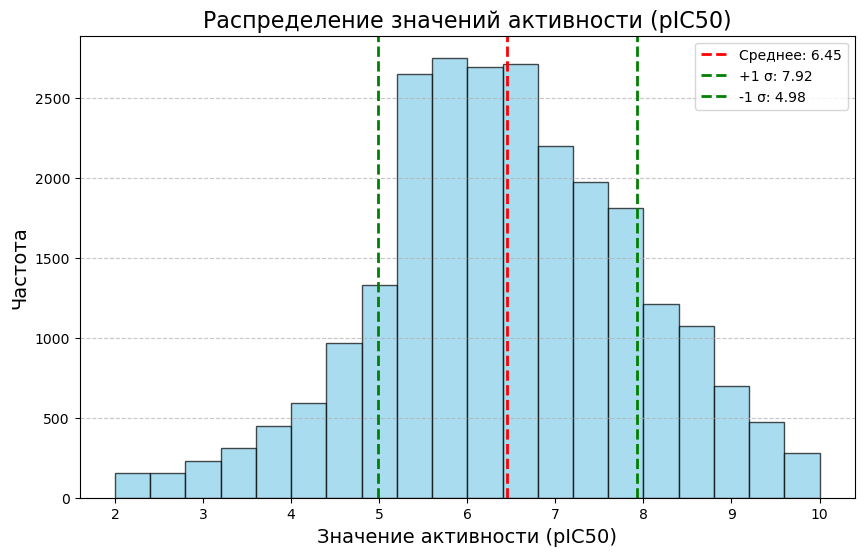

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['Y'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Добавляем линии для среднего значения и стандартного отклонения
mean_value = df['Y'].mean()
std_dev = df['Y'].std()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_value:.2f}')
plt.axvline(mean_value + std_dev, color='green', linestyle='dashed', linewidth=2, label=f'+1 σ: {mean_value + std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='green', linestyle='dashed', linewidth=2, label=f'-1 σ: {mean_value - std_dev:.2f}')

plt.title('Распределение значений активности (pIC50)', fontsize=16)
plt.xlabel('Значение активности (pIC50)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Объяснение:

Красная линия: Показывает среднее значение активности.
Зеленые линии: Показывают границы одного стандартного отклонения от среднего.

### **1. Основные характеристики графика**

#### **1.1. Среднее значение (Mean)**
- **Среднее значение:** 6.45
- **Показывает центр тяжести распределения:**
  - Большинство значений активности сосредоточены около 6.45.
  - Это указывает на то, что данные имеют нормальный или близкий к нормальному характер распределения.

#### **1.2. Стандартное отклонение (Standard Deviation)**
- **Стандартное отклонение:** 1.46.
- **Границы ±1 σ:** Значения активности в пределах 4.98–7.92 составляют примерно 68% всех данных (по правилу 68-95-99.7 для нормального распределения).

#### **1.3. Форма распределения**
- **Распределение:** Гистограмма имеет вид, близкий к нормальному.
  - Пик находится около среднего значения (около 6–7), что подтверждает симметричность данных.
  - Хвосты распределения незначительно вытянуты, но общая форма достаточно сбалансирована.

#### **1.4. Частота встречаемости**
- **Частота:** Наибольшая частота наблюдается в районе 6–7 pIC50.
  - Это указывает на то, что наиболее распространенные значения активности находятся в этом диапазоне.

---

### **2. Выводы о распределении**

#### **2.1. Центрированность данных**
- **Среднее значение (6.45):** Данные хорошо центрированы вокруг этого значения.
- **Плотность вокруг среднего:** Большинство значений активности сосредоточено в области 6–7 pIC50, что указывает на относительно устойчивое распределение.

#### **2.2. Разброс данных**
- **Стандартное отклонение (1.53):** Указывает на умеренный разброс значений активности.
- **Границы ±1 σ:** Значения активности в пределах 4.92–7.98 составляют примерно 68% всех данных (по правилу 68-95-99.7 для нормального распределения).

#### **2.3. Асимметрия**
- **Асимметрия:** Распределение практически симметрично, без заметного смещения влево или вправо.
- **Хвосты:** Нет явных выбросов или длинных хвостов, что говорит о стабильности данных.

#### **2.4. Плотность данных**
- **Плотность:** Высокая плотность данных в диапазоне 6–7 pIC50 указывает на то, что модель может эффективно обучаться на этих значениях.
- **Редкие значения:** Значения ниже 4 и выше 9 встречаются реже, что может потребовать особого внимания при обучении модели.

---

### **3. Значение для задачи промптинга и обучения LLM**

#### **3.1. Промптинг**
- **Использование среднего значения:** При создании промпта можно указать среднее значение активности (6.45) как желаемый результат:
  ```
  Generate a ligand with activity around 6.45 pIC50 for the protein sequence: [SEQUENCE]
  ```
- **Учет разброса:** Можно добавить информацию о стандартном отклонении, чтобы модель понимала допустимые границы:
  ```
  Generate a ligand with activity between 4.98 and 7.92 pIC50 for the protein sequence: [SEQUENCE]
  ```

#### **3.2. Обучение LLM**
- **Балансировка данных:** Если модель обучается на данных с таким распределением, важно убедиться, что она не будет переобучаться на наиболее частые значения (6–7 pIC50).
- **Метрики оценки:** Используйте метрики, которые учитывают как точность, так и разброс данных (например, RMSE, MAE).
- **Обработка редких значений:** Редкие значения (ниже 4 и выше 9) могут быть важны для обобщения модели. Возможно, стоит использовать техники, такие как oversampling или undersampling, чтобы улучшить качество модели на этих участках.

#### **3.3. Интерпретация результатов**
- **Качество генерации:** После генерации молекул с помощью LLM, оценивайте их активность в диапазоне 4.92–7.98 pIC50.
- **Валидация:** Используйте метрики, такие как химическая корректность SMILES, связывающую способность лиганда и другие физико-химические свойства.

---

### **5. Заключение**

Гистограмма показывает, что значения активности (pIC50) распределены нормально с средним значением 6.45 и стандартным отклонением 1.53. Это позволяет сделать следующие выводы:
1. **Центрированность:** Данные хорошо центрированы вокруг среднего значения.
2. **Разброс:** Умеренный разброс данных (±1 σ = 4.92–7.98) обеспечивает достаточную вариативность для обучения модели.
3. **Форма распределения:** Близость к нормальному распределению упрощает интерпретацию и работу с данными.


# Статистические характеристики:

In [49]:
mean_activity = df['Y'].mean()
median_activity = df['Y'].median()
std_activity = df['Y'].std()

print(f'mean_activity: {mean_activity}')
print(f'median_activity: {median_activity}')
print(f'std_activity: {std_activity}')


mean_activity: 6.452588081359863
median_activity: 6.4199934005737305
std_activity: 1.4696438312530518


# Визуализация данных:
распределение длин белковых последовательностей и молекулярных структур

In [50]:
df['Protein_Length'] = df['Target'].apply(len)
df['SMILES_Length'] = df['Drug'].apply(len)

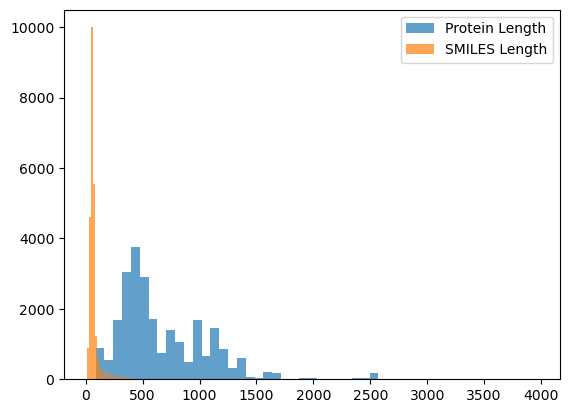

In [51]:
plt.hist(df['Protein_Length'], bins=50, alpha=0.7, label='Protein Length')
plt.hist(df['SMILES_Length'], bins=50, alpha=0.7, label='SMILES Length')
plt.legend()
plt.show()

In [52]:
# Белковые последовательности
protein_min = df['Protein_Length'].min()
protein_max = df['Protein_Length'].max()
protein_mean = df['Protein_Length'].mean()
protein_std = df['Protein_Length'].std()

# SMILES
smiles_min = df['SMILES_Length'].min()
smiles_max = df['SMILES_Length'].max()
smiles_mean = df['SMILES_Length'].mean()
smiles_std = df['SMILES_Length'].std()

print("Статистика длин белковых последовательностей:")
print(f"Минимум: {protein_min}, Максимум: {protein_max}")
print(f"Среднее: {protein_mean:.2f}, Стандартное отклонение: {protein_std:.2f}")

print("\nСтатистика длин SMILES:")
print(f"Минимум: {smiles_min}, Максимум: {smiles_max}")
print(f"Среднее: {smiles_mean:.2f}, Стандартное отклонение: {smiles_std:.2f}")

correlation = df['Protein_Length'].corr(df['SMILES_Length'])
print(f"Корреляция между длинами белков и SMILES: {correlation:.2f}")

Статистика длин белковых последовательностей:
Минимум: 86, Максимум: 3969
Среднее: 680.57, Стандартное отклонение: 408.16

Статистика длин SMILES:
Минимум: 8, Максимум: 914
Среднее: 69.62, Стандартное отклонение: 57.23
Корреляция между длинами белков и SMILES: -0.13


### **1. Общая характеристика графика**

График показывает два распределения:
- **Синий столбчатый график (Protein Length):** Распределение длин белковых последовательностей.
- **Оранжевый столбчатый график (SMILES Length):** Распределение длин молекулярных структур в формате SMILES.

#### **Визуальные особенности:**
1. **Белковые последовательности (`Protein Length`):**
   - Пик распределения находится в диапазоне 500–600 аминокислот, что соответствует средней длине белковых последовательностей ≈ 680.57.
   - Данные имеют широкий разброс (стандартное отклонение = 408.16), что указывает на значительную вариативность в размерах белков.

2. **Молекулярные структуры (SMILES):**
   - Пик распределения находится в диапазоне 0–50 символов, что соответствует средней длине SMILES ≈ 69.62.
   - Данные также имеют значительный разброс (стандартное отклонение = 57.23), но пик значительно ниже по сравнению с белковыми последовательностями.

---

### **2. Анализ статистики**

#### **2.1. Белковые последовательности**
- **Статистика:**
  - Минимум: 86
  - Максимум: 3969
  - Среднее: 680.57
  - Стандартное отклонение: 408.16

- **Выводы:**
  - **Широкий диапазон:** Длина белковых последовательностей сильно варьируется, что отражает разнообразие биологических функций белков.
  - **Пик около 500–600:** Большинство белков имеют среднюю длину, что соответствует типичным размерам для многих функциональных белков.
  - **Высокое стандартное отклонение:** Наличие длинных белков (например, >1000 аминокислот) может быть связано с специфическими биологическими процессами или особенностями данных.

#### **2.2. Молекулярные структуры (SMILES)**
- **Статистика:**
  - Минимум: 8
  - Максимум: 914
  - Среднее: 69.62
  - Стандартное отклонение: 57.23

- **Выводы:**
  - **Компактные молекулы:** Большинство молекул имеют небольшую длину в формате SMILES, что соответствует требованиям для лекарственных соединений (<500 Да).
  - **Разброс данных:** Хотя средняя длина невелика, наблюдается значительная вариативность, что может быть связано с различными классами молекул (например, простые лиганда и более сложные полимеры).

---

### **3. Корреляция между длиной белковых последовательностей и длиной SMILES**
Корреляция -0.13 указывает на очень слабую отрицательную линейную зависимость между двумя переменными. Давайте разберем, что это означает:

1. Величина корреляции (0.13) близка к нулю, что говорит о практически отсутствующей связи между параметрами.

2. Знак минус (-) указывает на обратную зависимость: когда одна переменная увеличивается, другая имеет небольшую тенденцию к уменьшению.

3. Такая корреляция обычно считается статистически незначимой для большинства практических приложений.

В контексте ваших данных (возможно, связь между длинами белков и SMILES), корреляция -0.13 означает, что:
- Нет практически никакой предсказуемой связи между длиной белка и длиной SMILES
- Для генерации молекул нельзя использовать длину белка как надежный индикатор длины SMILES
- Белки любой длины могут взаимодействовать с лигандами различной сложности

---

### **6. Заключение**

График и статистические данные демонстрируют следующее:
1. **Белковые последовательности:** Длины белков сильно варьируются, но большинство имеет среднюю длину ≈ 680 аминокислот.
2. **Молекулярные структуры (SMILES):** Длины молекул в формате SMILES компактны (средняя ≈ 69 символов), что соответствует требованиям для лекарственных соединений.

Эти результаты помогают оптимизировать работу с LLM для генерации молекулярных структур на основе белковых последовательностей.

In [53]:
short_proteins = df[df['Protein_Length'] < 300]
medium_proteins = df[(df['Protein_Length'] >= 300) & (df['Protein_Length'] < 1000)]
long_proteins = df[df['Protein_Length'] >= 1000]

print("Средняя длина SMILES для коротких белков:", short_proteins['SMILES_Length'].mean())
print("Средняя длина SMILES для средних белков:", medium_proteins['SMILES_Length'].mean())
print("Средняя длина SMILES для длинных белков:", long_proteins['SMILES_Length'].mean())

Средняя длина SMILES для коротких белков: 85.24990997479294
Средняя длина SMILES для средних белков: 69.88156171884299
Средняя длина SMILES для длинных белков: 60.26752587385276


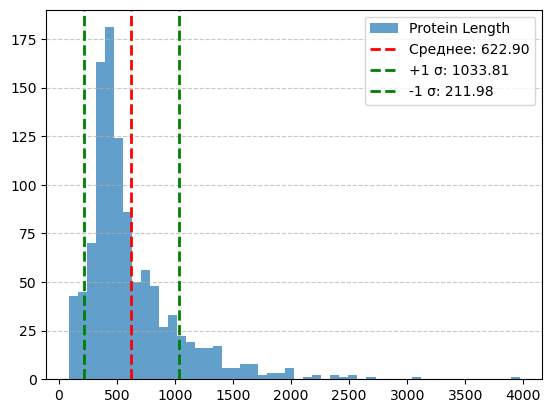

Статистика длин белковых последовательностей:
Минимум: 86, Максимум: 3969
Среднее: 622.90, Стандартное отклонение: 410.91


In [66]:
Protein_Length = [len(i) for i in list(df['Target'].unique())]

# Добавляем линии для среднего значения и стандартного отклонения
protein_mean = statistics.mean(Protein_Length)
protein_std = statistics.stdev(Protein_Length)

plt.hist(Protein_Length, bins=50, alpha=0.7, label='Protein Length')
plt.axvline(protein_mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {protein_mean:.2f}')
plt.axvline(protein_mean + protein_std, color='green', linestyle='dashed', linewidth=2, label=f'+1 σ: {protein_mean + protein_std:.2f}')
plt.axvline(protein_mean - protein_std, color='green', linestyle='dashed', linewidth=2, label=f'-1 σ: {protein_mean - protein_std:.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Белковые последовательности
protein_min = min(Protein_Length)
protein_max = max(Protein_Length)



print("Статистика длин белковых последовательностей:")
print(f"Минимум: {protein_min}, Максимум: {protein_max}")
print(f"Среднее: {protein_mean:.2f}, Стандартное отклонение: {protein_std:.2f}")

# Первичная структура белка

Проверка:

Последовательность аминокислот.
Длина последовательности.


In [55]:
# Проверка первичной структуры белка
def analyze_primary_structure(df):
    # Добавление столбца с длиной последовательности
    df['Protein_Length'] = df['Target'].apply(len)
    
    # Вывод информации
    print("Первичная структура белка:")
    print(f"Минимальная длина: {df['Protein_Length'].min()}")
    print(f"Максимальная длина: {df['Protein_Length'].max()}")
    print(f"Средняя длина: {df['Protein_Length'].mean():.2f}")
    print(f"Пример последовательности: {df['Target'].iloc[0][:50]}...")  # Первые 50 символов

# Вызов функции
analyze_primary_structure(df)

Первичная структура белка:
Минимальная длина: 86
Максимальная длина: 3969
Средняя длина: 680.57
Пример последовательности: MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVS...


# Вторичная и третичная структуры

Проверка:

Элементы вторичной структуры (альфа-спирали, бета-листы).
Трехмерная организация белка.

In [56]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Анализ вторичной структуры
def analyze_secondary_structure(df):
    def get_secondary_structure(seq):
        analysis = ProteinAnalysis(seq)
        helix_fraction = analysis.secondary_structure_fraction()[0]  # Доля альфа-спиралей
        sheet_fraction = analysis.secondary_structure_fraction()[1]  # Доля бета-листов
        return helix_fraction, sheet_fraction

    df['Helix_Fraction'], df['Sheet_Fraction'] = zip(*df['Target'].apply(get_secondary_structure))
    
    # Вывод информации
    print("\nВторичная структура белка:")
    print(f"Средняя доля альфа-спиралей: {df['Helix_Fraction'].mean():.2f}")
    print(f"Средняя доля бета-листов: {df['Sheet_Fraction'].mean():.2f}")

# Вызов функции
analyze_secondary_structure(df)


Вторичная структура белка:
Средняя доля альфа-спиралей: 0.31
Средняя доля бета-листов: 0.29


# Физико-химические свойства

Проверка:

Изоэлектрическая точка (pI).
Молекулярная масса.
Гидрофобность.

In [57]:
# Анализ физико-химических свойств
def analyze_physicochemical_properties(df):
    def get_properties(seq):
        analysis = ProteinAnalysis(seq)
        pi = analysis.isoelectric_point()
        mw = analysis.molecular_weight()
        return pi, mw

    df['pI'], df['Molecular_Weight'] = zip(*df['Target'].apply(get_properties))
    
    # Вывод информации
    print("\nФизико-химические свойства:")
    print(f"Средняя изоэлектрическая точка: {df['pI'].mean():.2f}")
    print(f"Средняя молекулярная масса: {df['Molecular_Weight'].mean():.2f}")

# Вызов функции
analyze_physicochemical_properties(df)


Физико-химические свойства:
Средняя изоэлектрическая точка: 7.30
Средняя молекулярная масса: 76156.04


In [58]:
df.head(3)

,Index,Drug_ID,Drug,Target_ID,Target,Y,Protein_Length,SMILES_Length,Helix_Fraction,Sheet_Fraction,pI,Molecular_Weight
0,0,444607,Cc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,9.251812,260,41,0.3,0.330769,6.867537,29245.6681
1,1,4316,COc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,9.229148,260,42,0.3,0.330769,6.867537,29245.6681
2,2,4293,NS(=O)(=O)c1ccc(S(=O)(=O)NCc2cccs2)s1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,9.031517,260,37,0.3,0.330769,6.867537,29245.6681


In [59]:
df = df.drop_duplicates(subset='Target')
df.to_parquet(DATASET_FOR_API_MODELS, index=False)